In [1]:
#Import all the libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

Source: Daddy
by Sylvia Plath

In [2]:
tokenizer = Tokenizer()

data = "Nice to meet you\nWhere you been?\nI could show you incredible things\nMagic, madness, heaven, sin\nSaw you there and I thought oh my god\nLook at that face, you look like my next mistake\nLove's a game, wanna play\nNew money, suit and tie\n I can read you like a magazine\n Ain't it funny rumors fly\n And I know you heard about me\n So hey, let's be friends\n I'm dying to see how this one ends\n Grab your passport and my hand\n I could make the bad guys good for a weekend\nSo it's gonna be forever\nOr it's gonna go down in flames\nYou can tell me when it's over\nIf the high was worth the pain\nGot a long list of ex-lovers\nThey'll tell you I'm nsane\nCause you know I love the players\nAnd you love the game\nCause we're young and we're reckless\nWe'll take this way too far\nIt'll leave you breathless\nOr with a nasty scar\nGot a long list of ex-lovers\nThey'll tell you I'm insane\nBut I got a blank space baby\nAnd I'll write your name\nCherry lips\nCrystal skies\nI could show you incredible things\nStolen kisses, pretty lies\nYou're the king baby I'm your queen\nFind out what you want\nBe that girl for a month\nBut the worst is yet to come\nOh no\nScreaming, crying, perfect storms\nI could make all the tables turn\nRose garden filled with thorns\nKeep you second guessing like oh my god\nWho is she? I get drunk on jealousy\nBut you'll come back each time you leave\nCause baby,I'm a nightmare dressed like a daydream\nSo it's gonna be forever\nOr it's gonna go down in flames\nYou can tell me when it's over\nIf the high was worth the pain\nGot a long list of ex-lovers\nThey'll tell you I'm insane\nCause you know I love the players\nAnd you love the game\nCause we're young and we're reckless\nWe'll take this way too far and leave you breathless\nOr with a nasty scar\nGot a long list of ex-lovers\nThey'll tell you I'm insane\nBut I got a blank space baby\nAnd I'll write your name\nBoys only want love if it's torture\nDon't say I didn't say I didn't warn you\nBoys only want love if it's torture\nDon't say I didn't say I didn't warn you\nSo it's gonna be forever\nOr it's gonna go down in flames\nYou can tell me when it's over"

# Converting data into corpus
corpus = data.lower().split("\n")

#Fitting the tokenizer on the corpus
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

print(tokenizer.word_index)
print(total_words) # 38 unique words

{'you': 1, 'i': 2, 'a': 3, 'the': 4, 'and': 5, "it's": 6, "i'm": 7, 'tell': 8, 'gonna': 9, 'got': 10, 'love': 11, 'be': 12, 'or': 13, 'cause': 14, 'could': 15, 'my': 16, 'like': 17, 'can': 18, 'me': 19, 'so': 20, 'your': 21, 'if': 22, 'long': 23, 'list': 24, 'of': 25, 'ex': 26, 'lovers': 27, "they'll": 28, "we're": 29, 'but': 30, 'baby': 31, 'say': 32, "didn't": 33, 'to': 34, 'oh': 35, 'game': 36, 'know': 37, 'this': 38, 'forever': 39, 'go': 40, 'down': 41, 'in': 42, 'flames': 43, 'when': 44, 'over': 45, 'leave': 46, 'with': 47, 'insane': 48, 'want': 49, 'show': 50, 'incredible': 51, 'things': 52, 'god': 53, 'look': 54, 'that': 55, 'make': 56, 'for': 57, 'high': 58, 'was': 59, 'worth': 60, 'pain': 61, 'players': 62, 'young': 63, 'reckless': 64, "we'll": 65, 'take': 66, 'way': 67, 'too': 68, 'far': 69, 'breathless': 70, 'nasty': 71, 'scar': 72, 'blank': 73, 'space': 74, "i'll": 75, 'write': 76, 'name': 77, 'is': 78, 'come': 79, 'boys': 80, 'only': 81, 'torture': 82, "don't": 83, 'warn':

In [3]:
#Creating input sequences for training the data
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

#pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

#create predictors and label
xs,labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels,num_classes= total_words)


In [4]:
print(tokenizer.word_index['nice'])
print(tokenizer.word_index['to'])
print(tokenizer.word_index['meet'])
print(tokenizer.word_index['you'])

85
34
86
1


The above command shows the word index for the first line of the poem. Now next task is to see if our x is taking the first n-1 numbers and our y should be n for that scenario. Let's check it. In the below example the `xs[2]` indicates `[ 0  0  0  0  0  0 85 34 86]` and from the above sequence the next number is `1`. In y our one hot encode should indicate 1 at 1st position

In [5]:
print(xs[2])

[ 0  0  0  0  0  0 85 34 86]


In [6]:
print(ys[2])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
#Buliding a simple model

model = Sequential()
model.add(Embedding(total_words,64, input_length = max_sequence_len-1)) #Embedding the total words in 64 dimensions 
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam',metrics=['accuracy']) # Cateogorical label that's the reason we are using categorical_crossentropy
history = model.fit(xs,ys,epochs = 250, verbose= 1)

Train on 356 samples
Epoch 1/250
356/356 [==============================] - 4s 11ms/sample - loss: 5.1805 - accuracy: 0.0478
Epoch 2/250
356/356 [==============================] - 0s 381us/sample - loss: 5.1556 - accuracy: 0.0646
Epoch 3/250
356/356 [==============================] - 0s 377us/sample - loss: 5.1147 - accuracy: 0.0646
Epoch 4/250
356/356 [==============================] - 0s 398us/sample - loss: 5.0188 - accuracy: 0.0646
Epoch 5/250
356/356 [==============================] - 0s 418us/sample - loss: 4.8491 - accuracy: 0.0646
Epoch 6/250
356/356 [==============================] - 0s 371us/sample - loss: 4.7188 - accuracy: 0.0646
Epoch 7/250
356/356 [==============================] - 0s 454us/sample - loss: 4.6766 - accuracy: 0.0646
Epoch 8/250
356/356 [==============================] - 0s 411us/sample - loss: 4.6381 - accuracy: 0.0646
Epoch 9/250
356/356 [==============================] - 0s 413us/sample - loss: 4.6043 - accuracy: 0.0646
Epoch 10/250
356/356 [=============

356/356 [==============================] - 0s 357us/sample - loss: 1.4498 - accuracy: 0.7921
Epoch 79/250
356/356 [==============================] - 0s 373us/sample - loss: 1.4223 - accuracy: 0.7921
Epoch 80/250
356/356 [==============================] - 0s 374us/sample - loss: 1.3992 - accuracy: 0.7978
Epoch 81/250
356/356 [==============================] - 0s 349us/sample - loss: 1.3762 - accuracy: 0.8062
Epoch 82/250
356/356 [==============================] - 0s 336us/sample - loss: 1.3523 - accuracy: 0.8006
Epoch 83/250
356/356 [==============================] - 0s 371us/sample - loss: 1.3330 - accuracy: 0.8062
Epoch 84/250
356/356 [==============================] - 0s 367us/sample - loss: 1.3148 - accuracy: 0.8090
Epoch 85/250
356/356 [==============================] - 0s 339us/sample - loss: 1.2926 - accuracy: 0.8118
Epoch 86/250
356/356 [==============================] - 0s 348us/sample - loss: 1.2752 - accuracy: 0.8202
Epoch 87/250
356/356 [==============================] - 0s 

356/356 [==============================] - 0s 396us/sample - loss: 0.5481 - accuracy: 0.9101
Epoch 155/250
356/356 [==============================] - ETA: 0s - loss: 0.5363 - accuracy: 0.91 - 0s 301us/sample - loss: 0.5585 - accuracy: 0.8989
Epoch 156/250
356/356 [==============================] - 0s 365us/sample - loss: 0.5502 - accuracy: 0.9045
Epoch 157/250
356/356 [==============================] - 0s 334us/sample - loss: 0.5563 - accuracy: 0.9045
Epoch 158/250
356/356 [==============================] - 0s 361us/sample - loss: 0.5501 - accuracy: 0.9045
Epoch 159/250
356/356 [==============================] - 0s 360us/sample - loss: 0.5372 - accuracy: 0.9073
Epoch 160/250
356/356 [==============================] - 0s 338us/sample - loss: 0.5287 - accuracy: 0.9045
Epoch 161/250
356/356 [==============================] - 0s 346us/sample - loss: 0.5260 - accuracy: 0.9157
Epoch 162/250
356/356 [==============================] - 0s 357us/sample - loss: 0.5261 - accuracy: 0.9185
Epoch 163

356/356 [==============================] - 0s 442us/sample - loss: 0.2856 - accuracy: 0.9522
Epoch 230/250
356/356 [==============================] - 0s 421us/sample - loss: 0.2829 - accuracy: 0.9522
Epoch 231/250
356/356 [==============================] - 0s 365us/sample - loss: 0.2799 - accuracy: 0.9494
Epoch 232/250
356/356 [==============================] - 0s 337us/sample - loss: 0.2786 - accuracy: 0.9522
Epoch 233/250
356/356 [==============================] - 0s 392us/sample - loss: 0.2766 - accuracy: 0.9494
Epoch 234/250
356/356 [==============================] - 0s 312us/sample - loss: 0.2741 - accuracy: 0.9522
Epoch 235/250
356/356 [==============================] - 0s 396us/sample - loss: 0.2722 - accuracy: 0.9494
Epoch 236/250
356/356 [==============================] - 0s 311us/sample - loss: 0.2705 - accuracy: 0.9522
Epoch 237/250
356/356 [==============================] - 0s 343us/sample - loss: 0.2677 - accuracy: 0.9494
Epoch 238/250
356/356 [============================

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

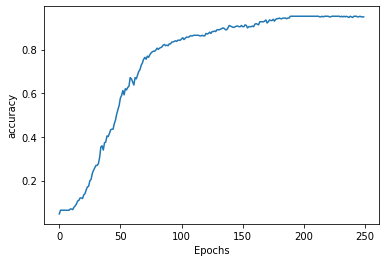

In [20]:
plot_graphs(history,'accuracy')

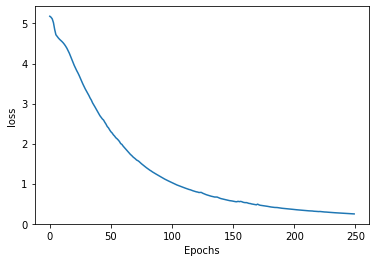

In [21]:
plot_graphs(history,'loss')

In [22]:
#Predicting words using the above words used

seed_text = "If the high was worth the pain" # this is the base sentence for our predictions
next_words = 10 #Number of words you want to predict

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0] #Tokenizing our seed_text
    token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding ='pre') #Pads the sentence to match the way of our training data
    predicted = model.predict_classes(token_list,verbose =0) # To get the token of the word which is most likely to be next
    output_word = ""
    for word,index in tokenizer.word_index.items(): #Reverse word index to get the word based on the above token
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word # Add the output word to our seed_text
print(seed_text)

If the high was worth the pain pain pain torture torture and if didn't warn you like


The more words we predict the more gibberish our outcome tends to be
> Using large corpus we can eliminate this